# Lab 8

This lab will do some review of regular expressions, then focus on functions, conditions, and vectors.

## Table of Contents
* [Review/Explore](#Review/Explore)
* [Exercises](#Exercises)

In [2]:
library(tidyverse)
library(stringr)

## Review/Explore

### Previous HW

As there were many questions about last week's HW assignment and multiple inefficient ways I saw some people solving them, I thought it would be worthwile to go over a few of the questions together.

**Problem 2**

The word-boundary character class \b matches the beginning and end of a word. Use this character class to write a regular expression re2 such that str_count(s, re2) counts the number of words in the string s. Here a word is defined a consecutive string of letters, numbers or underscores.

In [6]:
# To solve this, take a quick look at what the word-boundary regex does, try to think in terms of what we want
tst = "\\b"
str_view_all("this is a word",tst)

HTML widgets cannot be represented in plain text (need html)

In [7]:
#Based on this, what we want, is a pattern that is something like:
# word-boundary + any number of letters/characters + word-boundary
#Hence, the solution
sln = "\\b\\w+\\b"

In [8]:
str_view_all("this is a word",sln)

HTML widgets cannot be represented in plain text (need html)

**Problem 3**

Write a regular expression which matches any word containing exactly two vowels, regardless of case. Store this regular expression in a variable named re3.

In [9]:
# Since we need exactly two of something, we know we need to use the {} brackets
# Also, note that within each word we want to a vowel surrounded by 0 or more consonants
# Here's how we can find one vowel
vow = "[aoeui]"
# Here's how we can find 0 or more consonants (not vowels)
ocon = "[^aoeui]*"
# Now we can combine this together with curly brackets surrounded by word-boundaries
sln = str_c("\\b(", ocon, vow, ocon, "){2}\\b")
sln

[1] "\\b([^aoeui]*[aoeui][^aoeui]*){2}\\b"

In [10]:
# Let's take it for a spin
str_detect(c('aba', 'aa','fkbkbfgo','aaa','thirteen'),sln)

[1]  TRUE  TRUE FALSE FALSE FALSE

**Problem 4**

Write a regular expression which matches proper nouns. A proper noun is defined as one or more capitalized words, optionally separated by the word(s) "and", "of", "the", and/or "by". Store your expression in a variable called re4. (If a capitalized word occurs at the beginning of a sentence, you may assume it is part of a proper noun.)

In [11]:
# Let's break this problem down, first, we know we need to find words that begin with a capital letter, so lets do that
#Ok so we want one or capital letters to start, followed by 0 or more lowercase letters
tst = "[A-Z]+[\\w]*"
str_view_all("the Jabba Monster Is great",tst)

HTML widgets cannot be represented in plain text (need html)

In [12]:
# Great, so now let's try to add the second condition, we want words that follow this pattern and follow 0 or more
# of the key words given in the problem
tst = "[A-Z]+[\\w]* ((and|of|the|or|by))*"
str_view_all("the Jabba the Monster Is great",tst)

HTML widgets cannot be represented in plain text (need html)

In [13]:
#Alright, but we want to connect these separate matches together somehow, so let's find 0 or more of this same pattern
# Also, let's add a space after the key words (and, of, etc.)
tst = "([A-Z]+[\\w]* ((and|of|the|or|by) )*)*"
str_view_all(c("test Test Test of Test", "Test the Test    of Test", "The Test of the or by Test of Test"),tst)

HTML widgets cannot be represented in plain text (need html)

In [14]:
# Great, so last step is now making sure we only continue with this pattern when we have found another word after
# That also has a capital letter
sln = "([A-Z]+[\\w']* ((and|of|the|or|by) )*)*[A-Z]+[\\w']*"
str_view_all(c("test Test Test of Test", "Test the Test of Test", "The Test of the or by Test of Test"),sln)

HTML widgets cannot be represented in plain text (need html)

### Conditions

There are two main conditional arguments you will encounter in R, IF statements and IFELSE statements. They are essentially the same thing, but IF statements can incorporate more complex logic.

In [17]:
#If I wanted to identify even numbers between 10 and 30 and even numbers between 50 and 60 
tst_number = 11

if (tst_number%%2==0) {
    if (tst_number>=10 & tst_number<=30) {
        print('got one here sir!')
    } else if (tst_number>=50 & tst_number<=60){
        print('got a big one here sir!')
    }
    else {
        print('sorry buddy, try again')
    }
} else {
    print('sorry buddy, try again')
}

[1] "sorry buddy, try again"


In [19]:
#Using an ifelse statement, you can condense multiple lines of code into a single function (very useful sometimes!)

#If I wanted to make a new column that flags a column as even or odd
#First, setup data
nums = c(1:10)
dta = data.frame(nums)
#Now, create new column
dta$evnflg = ifelse(dta$nums %% 2 == 0, 'even', 'odd')
dta

nums,evnflg
1,odd
2,even
3,odd
4,even
5,odd
6,even
7,odd
8,even
9,odd
10,even


### Functions

For this section we will explore functions by making a game together! The game will be based on a randomly created board of black and white tiles. Multiple players are added to the board on the far right end. The goal of the game is to get to the far left end of the board first. Each player can take one step at a time, and cannot step on black squares.

Let the races begin!

In [20]:
# Make a function to create a board of a specific size
make_board = function(height,width) {
    size = height*width
    brd = matrix(sample(c(1,0,0),size,replace = TRUE), nrow=height)
    return(brd)
}

In [22]:
#Make a function to place the players on the board
set_players = function(players,board) {
    play = 1:players+1
    max_board = ncol(board)
    for (i in seq(players)){
        board[max_board,i] = play[i]
    }
    return(board)
}

In [23]:
# Make a function to print the board we create
print_board = function(brd,players) {
    colors = c('white','black',colors()[10:(10+players-1)])
    image(brd,col=colors,axes = FALSE)
}

In [26]:
# Make a function to take a step in the game
take_step = function(brd, playernum,step) {
    rw = which(brd==playernum,arr.ind=TRUE)[1]
    cl = which(brd==playernum,arr.ind=TRUE)[2]
    if (step == 'left') {
        brd[rw,cl] = 0
        brd[row,cl-1] = playernum
        invisible(return(brd))
    } else if (step == 'right') {
        brd[rw,cl] = 0
        brd[rw,cl+1] = playernum
        invisible(return(brd))
    } else if (step == 'up') {
        brd[rw,cl] = 0
        brd[rw-1,cl] = playernum
        invisible(return(brd))
    } else if (step == 'down') {
        brd[rw,cl] = 0
        brd[rw+1,cl] = playernum
        invisible(return(brd))
    } else {
        print("Invalid step type! Only up, down, left, or right steps are allowed.")
    }
}

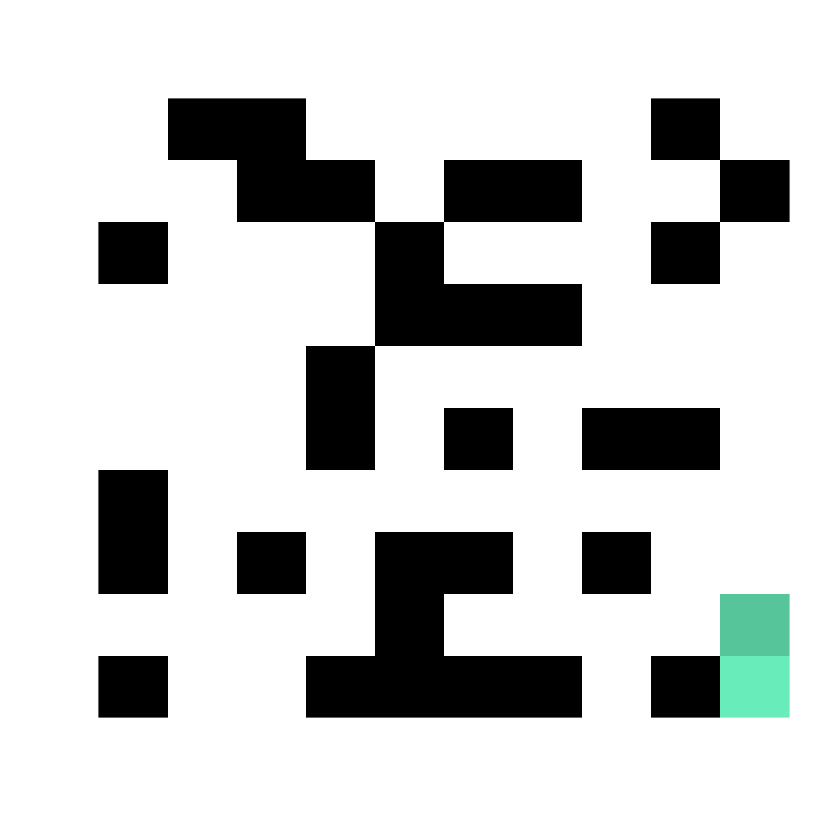

In [27]:
# Alright, now we are ready to play the game

#Let's first just setup a 10 x 10 board to play on with 2 players
set.seed(12)
brd = make_board(10,10)
plyrs = 2
# Now we can add two players to the board
brd = set_players(plyrs,brd)
# Let's see what the board looks like now
print_board(brd,plyrs)

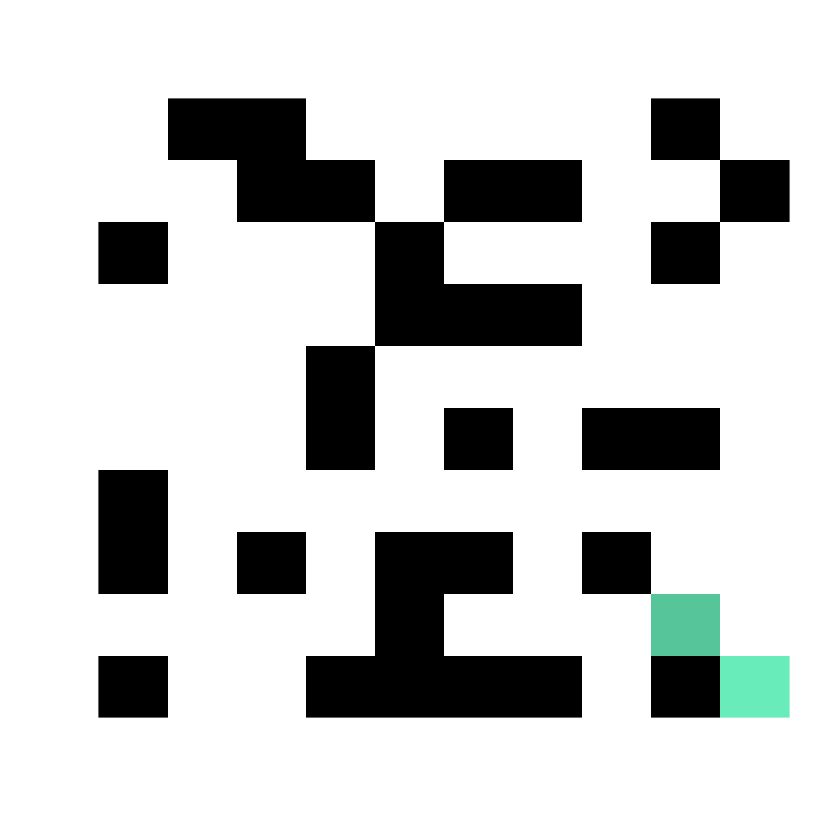

In [28]:
# Let's move player 2 (3 in our matrix) up
brd = take_step(brd,3,'up')
print_board(brd,plyrs)

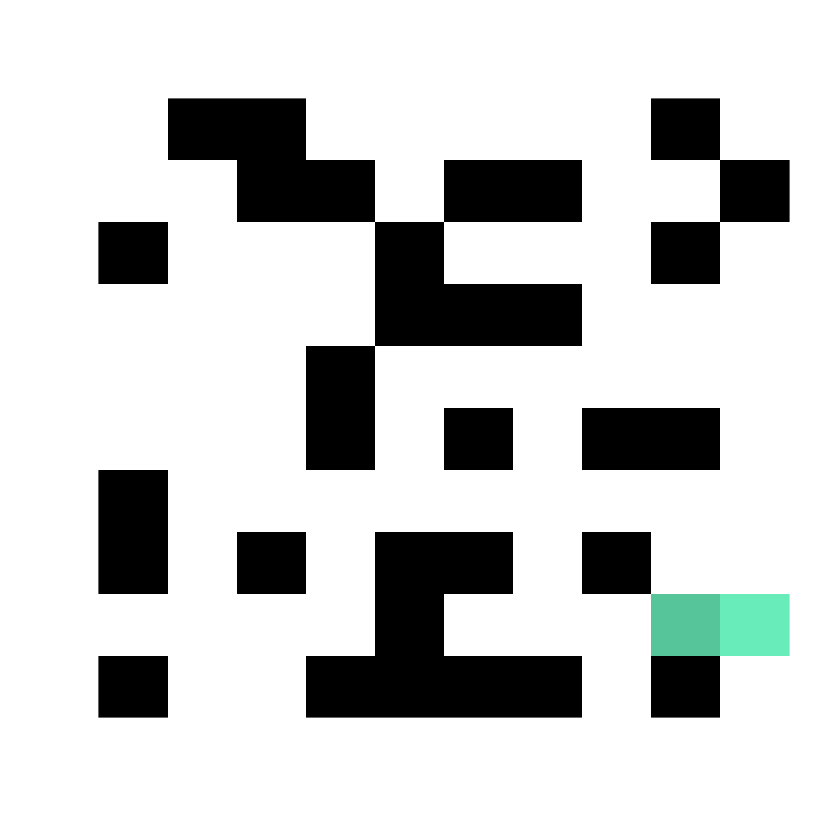

In [29]:
#Alright now lets move player 1 to the right
brd = take_step(brd,2,'right')
print_board(brd,plyrs)

## Exercises

### Section 19

In [ ]:
# Why is TRUE not a parameter to rescale01()? What would happen if x contained a single missing value, 
# and na.rm was FALSE?


In [ ]:
# Write both_na(), a function that takes two vectors of the same length and returns the number of
# positions that have an NA in both vectors.


In [ ]:
# What do the following functions do? Why are they useful even though they are so short?
is_directory <- function(x) file.info(x)$isdir
is_readable <- function(x) file.access(x, 4) == 0


In [ ]:
# Read the source code for each of the following three functions, puzzle out what they do, and then
# brainstorm better names.

f1 <- function(string, prefix) {
substr(string, 1, nchar(prefix)) == prefix }

f2 <- function(x) {
if (length(x) <= 1) return(NULL)
x[-length(x)]
}
    
f3 <- function(x, y) {
rep(y, length.out = length(x))
}
    

In [ ]:
# Compare and contrast rnorm() and MASS::mvrnorm(). How could you make them more consistent?


In [ ]:
# What’s the difference between if and ifelse()? Carefully read the help and construct three examples
# that illustrate the key differences.


In [ ]:
# Implement a fizzbuzz function. It takes a single number as input. If the number is divisible by three,
# it returns “fizz”. If it’s divisible by five it returns “buzz”. If it’s divisible by three and five, it returns
# “fizzbuzz”. Otherwise, it returns the number. Make sure you first write working code before you create the function.


In [ ]:
# What does this switch() call do? What happens if x is “e”?
# switch(x, a = , b = "ab", c = , d = "cd")


In [ ]:
# What does commas(letters, collapse = "-") do? Why?
commas <- function(...) {
  stringr::str_c(..., collapse = ", ")
}


In [ ]:
# It’d be nice if you could supply multiple characters to the pad argument, e.g. rule("Title", pad =
# "-+"). Why doesn’t this currently work? How could you fix it?


In [ ]:
# The default value for the method argument to cor() is c("pearson", "kendall", "spearman").
# What does that mean? What value is used by default?


### Section 20

In [ ]:
# Describe the difference between is.finite(x) and !is.infinite(x).


In [ ]:
# Read the source code for dplyr::near() (Hint: to see the source code, drop the ()). How does it work?


In [ ]:
# What functions from the readr package allow you to turn a string into logical, integer, and double vector?


In [ ]:
# What does mean(is.na(x)) tell you about a vector x? What about sum(!is.finite(x))?


In [ ]:
# Compare and contrast setNames() with purrr::set_names().


In [ ]:
# Why is x[-which(x > 0)] not the same as x[x <= 0]?


In [ ]:
# What happens if you subset a tibble as if you’re subsetting a list? What are the key differences between
# a list and a tibble?


In [ ]:
# What does hms::hms(3600) return? How does it print? What primitive type is the augmented vector
# built on top of? What attributes does it use?


In [ ]:
# Try and make a tibble that has columns with different lengths. What happens?
